# Test logistic regression to identify if a PDF is the two-phase or one-phase

Learn tensorflow 2.0 APIs and test the logistic regression.

## Import necessary modules

In [1]:
# python built-in libraries
import datetime

In [2]:
# choose the tensorflow log level
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [3]:
# import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# local packages
import tfhelper.core as tfhelper

## Global Variables

In [5]:
# sampling
DATA_DIR = "../21st_create_pdfmixs/pdfs_two_phase/"
FRACTIONS = (16 / 1.1e5, 4 / 1.1e5, 4 / 1.1e5)
BATCH_SIZE = 4
THRESHOLD = 0.95
# training
LEARNING_RATE = 0.001
BETA1 = 0.9
BETA2 = 0.999
EPOCHS = 5
# saving
TIME_STAMP = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
SAVE_LOC = "./data/models/test_logistic_regression"
LOG_LOC = "./data/logs/fit/{}".format(TIME_STAMP)

## Obtain some example data

The data is a 209 data point PDF. The label is a one-hot 2 dim vector. `10` means major phase >= threshold, `01` means major phase <= threshold.

Here, we only want to test the code so we choose a small number of files as a test.

In [6]:
train_data, valid_data, test_data = tfhelper.create_seqs(DATA_DIR, BATCH_SIZE, fractions=FRACTIONS, threshold=THRESHOLD)

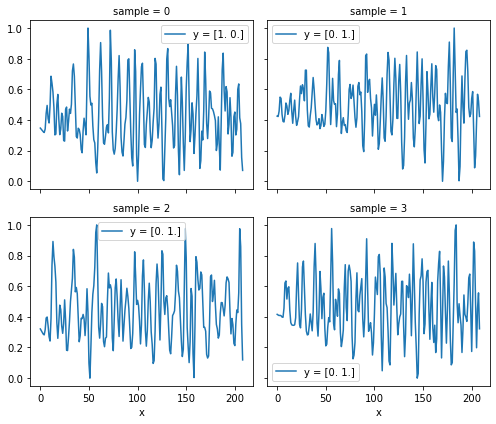

In [7]:
train_data.visualize(0)

## Create the model

We use the logistric regression. It is a single layer with a softmax function.

In [8]:
def create_model():
    model = keras.Sequential()
    model.add(keras.Input(shape=(209,)))
    model.add(layers.Dense(2, activation="softmax"))
    return model

In [9]:
model = create_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 420       
Total params: 420
Trainable params: 420
Non-trainable params: 0
_________________________________________________________________


## Choose optimization method

In [11]:
model.compile(
    # Optimizer
    optimizer=keras.optimizers.Adam(LEARNING_RATE, BETA1, BETA2),
    # Loss function to minimize
    loss=keras.losses.CategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.CosineSimilarity()],
)

## Train the model

Here, it is just a functional test. We only test 2 epochs to see if the code works or not.

In [12]:
# tensor board
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=LOG_LOC, histogram_freq=1)

In [13]:
history = model.fit(
    x=train_data,
    epochs=EPOCHS,
    callbacks=[tensorboard_callback],
    validation_data=valid_data
)

Epoch 1/5
4/4 [==============================] - 8s 2s/step - loss: 0.7232 - cosine_similarity: 0.7069 - val_loss: 0.3441 - val_cosine_similarity: 0.9241
Epoch 2/5
4/4 [==============================] - 1s 135ms/step - loss: 0.5934 - cosine_similarity: 0.7667 - val_loss: 0.3688 - val_cosine_similarity: 0.9124
Epoch 3/5
4/4 [==============================] - 0s 81ms/step - loss: 0.6384 - cosine_similarity: 0.7428 - val_loss: 0.4117 - val_cosine_similarity: 0.8903
Epoch 4/5
4/4 [==============================] - 0s 80ms/step - loss: 0.6274 - cosine_similarity: 0.7482 - val_loss: 0.4256 - val_cosine_similarity: 0.8827
Epoch 5/5
4/4 [==============================] - 0s 79ms/step - loss: 0.6608 - cosine_similarity: 0.7271 - val_loss: 0.4316 - val_cosine_similarity: 0.8794


## Evaluate the model

In [17]:
result = model.evaluate(
    x=test_data,
    return_dict=True
)

1/1 [==============================] - 0s 91ms/step - loss: 1.1046 - cosine_similarity: 0.4981


In [23]:
for name, val in result.items():
    print("{:20s} {:.4f}".format(name, val))

loss                 1.1046
cosine_similarity    0.4981


## Save the model

In [14]:
model.save(SAVE_LOC)

INFO:tensorflow:Assets written to: ./data/models/test_logistic_regression/assets
